In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [3]:
df.shape

(40432, 5)

## 1.data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40432 non-null  int64  
 1   category    40432 non-null  object 
 2   rating      40432 non-null  float64
 3   label       40432 non-null  object 
 4   text_       40431 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0    0
category      0
rating        0
label         0
text_         1
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True) # dropping the unnecessary column 'UNAMED'

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(40431, 4)

In [10]:
df.rename(columns = {'label' : 'target' , 'text_': 'text' }, inplace=True)
df.sample(5)

,category,rating,target,text
32621,Books_5,5.0,OR,i reluct tri process feel bit snobbi mid-car a...
18917,Tools_and_Home_Improvement_5,4.0,OR,a state anoth review electronics-dim product i...
10990,Electronics_5,5.0,CG,i paid arriv time i keep review order share ex...
442,Home_and_Kitchen_5,5.0,OR,soft soft soft we love we would order without ...
21817,Pet_Supplies_5,5.0,CG,my cat id get eat 's small dog cat love treat....


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 0, ..., 1, 0, 1])

In [12]:
#  0 for CG & 1 for OG
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()


,category,rating,target,text
0,Home_and_Kitchen_5,5.0,0,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,0,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,0,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,0,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,0,veri nice set good qualiti we set two month


## 2.EDA

In [14]:
df['target'].value_counts()

1    20216
0    20215
Name: target, dtype: int64

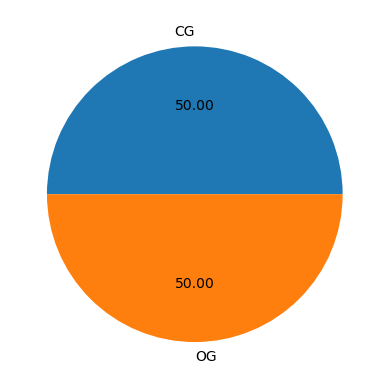

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() ,labels=['CG' , 'OG'], autopct="%0.2f")
plt.show()

In [16]:
# Data is balanced

In [17]:
import nltk


In [18]:
#!pip install nltk
#nltk.download('punkt')

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,category,rating,target,text,num_characters
0,Home_and_Kitchen_5,5.0,0,love well made sturdi comfort i love veri pretti,48
1,Home_and_Kitchen_5,5.0,0,love great upgrad origin i 've mine coupl year,46
2,Home_and_Kitchen_5,5.0,0,thi pillow save back i love look feel pillow,44
3,Home_and_Kitchen_5,1.0,0,miss inform use great product price i,37
4,Home_and_Kitchen_5,5.0,0,veri nice set good qualiti we set two month,43


In [21]:
#num of words
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0          9
1          9
2          9
3          7
4          9
        ... 
40427    198
40428    144
40429    216
40430    163
40431    189
Name: text, Length: 40431, dtype: int64

In [22]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(15)
df.sample(15)

,category,rating,target,text,num_characters,num_words
29247,Books_5,5.0,1,just receiv today -- anoth great one ina my wi...,82,16
37597,Clothing_Shoes_and_Jewelry_5,5.0,1,i sock year i realli like will buy need,39,9
29177,Books_5,5.0,0,i like seri they fun entertain i keep read ver...,52,11
26257,Kindle_Store_5,4.0,1,i absolut love book lucki might need dose real...,182,35
7841,Sports_and_Outdoors_5,4.0,1,i usual n't carri mosquito rare time i i want ...,815,144
22034,Pet_Supplies_5,1.0,0,tri free sampl nowher el qualiti treat good lo...,136,23
11628,Electronics_5,5.0,1,i 've long shi away bluetooth earbud 's annoy ...,583,109
24115,Kindle_Store_5,5.0,1,veri good stori man find i need read aurthor t...,52,10
21101,Pet_Supplies_5,5.0,0,nice tray it wide open bottom the tray slide a...,63,12
16548,Tools_and_Home_Improvement_5,5.0,1,easi instal comfort stabl wide grip larger pla...,105,17


In [23]:
#df['length'] = df['text'].apply(len)

In [24]:
df.shape

(40431, 6)

In [25]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
#df.drop('length',axis=1,inplace=True)

In [27]:
df.head(15)

,category,rating,target,text,num_characters,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,0,love well made sturdi comfort i love veri pretti,48,9,1
1,Home_and_Kitchen_5,5.0,0,love great upgrad origin i 've mine coupl year,46,9,1
2,Home_and_Kitchen_5,5.0,0,thi pillow save back i love look feel pillow,44,9,1
3,Home_and_Kitchen_5,1.0,0,miss inform use great product price i,37,7,1
4,Home_and_Kitchen_5,5.0,0,veri nice set good qualiti we set two month,43,9,1
5,Home_and_Kitchen_5,3.0,0,i want differ flavor but they are not,37,8,1
6,Home_and_Kitchen_5,5.0,0,they perfect touch thing i wish littl space,43,8,1
7,Home_and_Kitchen_5,3.0,0,these done fit well look great i love smooth e...,54,11,1
8,Home_and_Kitchen_5,5.0,0,great big number easi read thing i n't like size,48,10,1
9,Home_and_Kitchen_5,5.0,0,my son love comfort well made we also babi,42,9,1


In [28]:
df.sample(50)

,category,rating,target,text,num_characters,num_words,num_sentences
13560,Movies_and_TV_5,5.0,1,i seen tv year ago forgot funni rowan atkinson...,116,23,1
38758,Clothing_Shoes_and_Jewelry_5,5.0,0,i purchas product wife love she also love way ...,82,16,1
28521,Books_5,4.0,0,a.good read relationship island peopl namesak ...,58,8,1
2345,Home_and_Kitchen_5,5.0,0,i bought gift daughter love it 's great gift p...,95,19,1
22228,Pet_Supplies_5,1.0,1,the materi qualiti fine thinnest bed i ever pu...,239,40,1
6367,Sports_and_Outdoors_5,5.0,1,sure beat price sure 's differ gener metal toe...,173,31,1
5388,Sports_and_Outdoors_5,4.0,0,thi bit basic work the two button side cup lit...,54,11,1
20568,Pet_Supplies_5,5.0,0,onli dog food i could find the food i 've tri ...,64,14,1
16408,Tools_and_Home_Improvement_5,5.0,1,blade came makita cours fine cut for price i l...,55,11,1
19322,Tools_and_Home_Improvement_5,4.0,0,thi 3-speed-plu i.e. ca n't turn it small 's w...,689,123,2


In [29]:
df[['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,40431.000000,40431.000000,40431.000000
mean,205.767109,38.185872,1.004106
std,219.422327,39.498570,0.080396
min,8.000000,1.000000,1.000000
25%,64.000000,12.000000,1.000000
50%,116.000000,22.000000,1.000000
75%,253.000000,48.000000,1.000000
max,2232.000000,322.000000,9.000000


In [30]:
#CG
df[df['target']==0][['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20215.000000,20215.000000,20215.000000
mean,173.639030,33.329260,1.001286
std,173.955252,33.249338,0.063678
min,13.000000,2.000000,1.000000
25%,57.000000,11.000000,1.000000
50%,99.000000,19.000000,1.000000
75%,217.000000,42.000000,1.000000
max,1300.000000,229.000000,9.000000


In [31]:
#OG
df[df['target']==1][['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20216.000000,20216.000000,20216.000000
mean,237.893599,43.042244,1.006925
std,252.920950,44.358067,0.094108
min,8.000000,1.000000,1.000000
25%,74.000000,14.000000,1.000000
50%,134.000000,25.000000,1.000000
75%,296.000000,54.000000,1.000000
max,2232.000000,322.000000,4.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

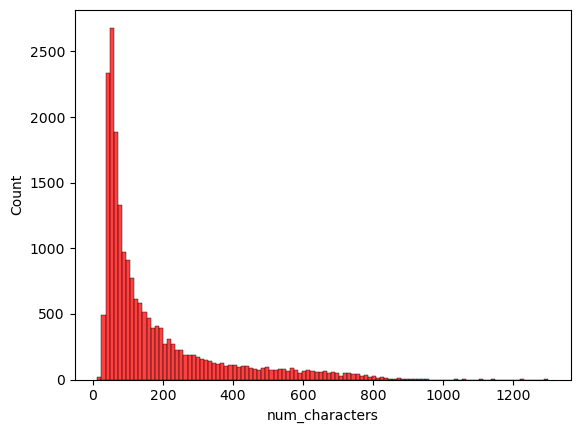

In [33]:
sns.histplot(df[df['target']==0]['num_characters'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

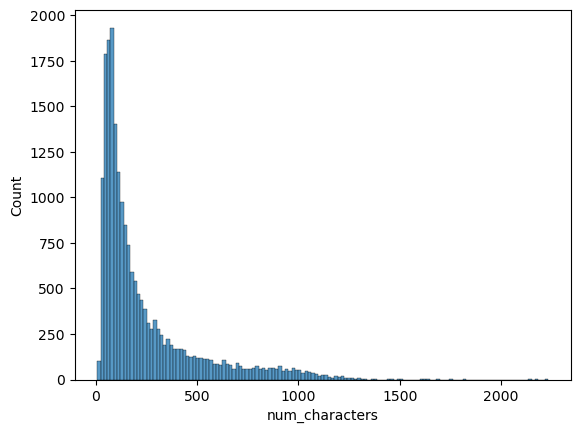

In [34]:
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

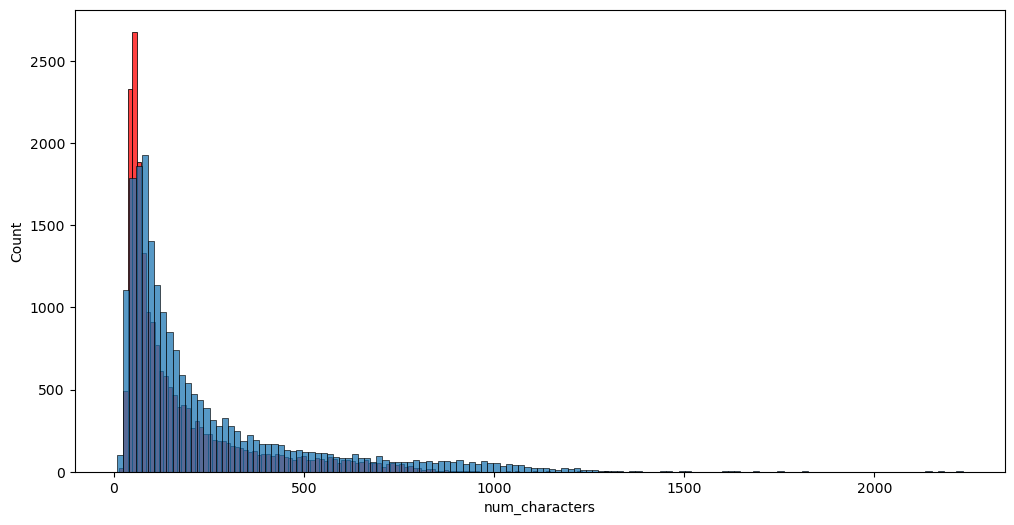

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'],)

<Axes: xlabel='num_words', ylabel='Count'>

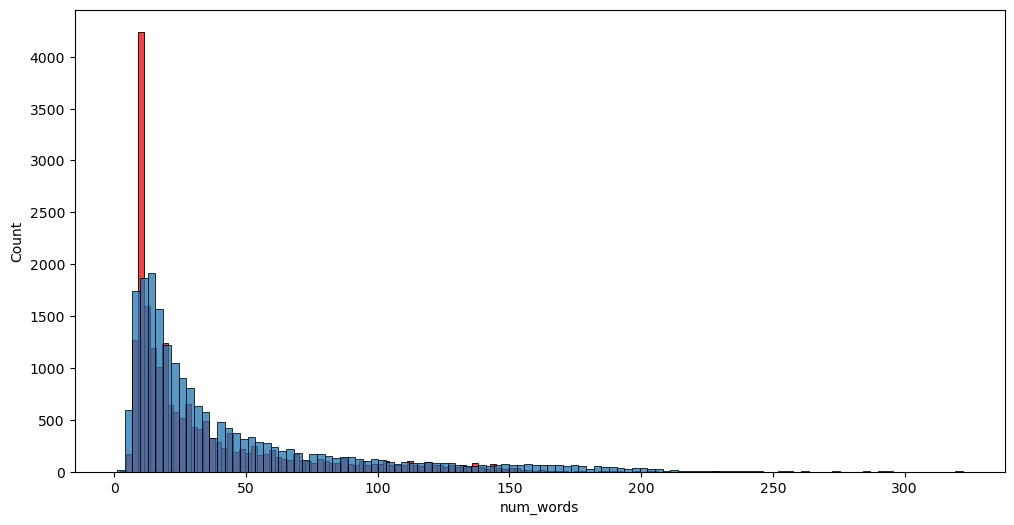

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'])

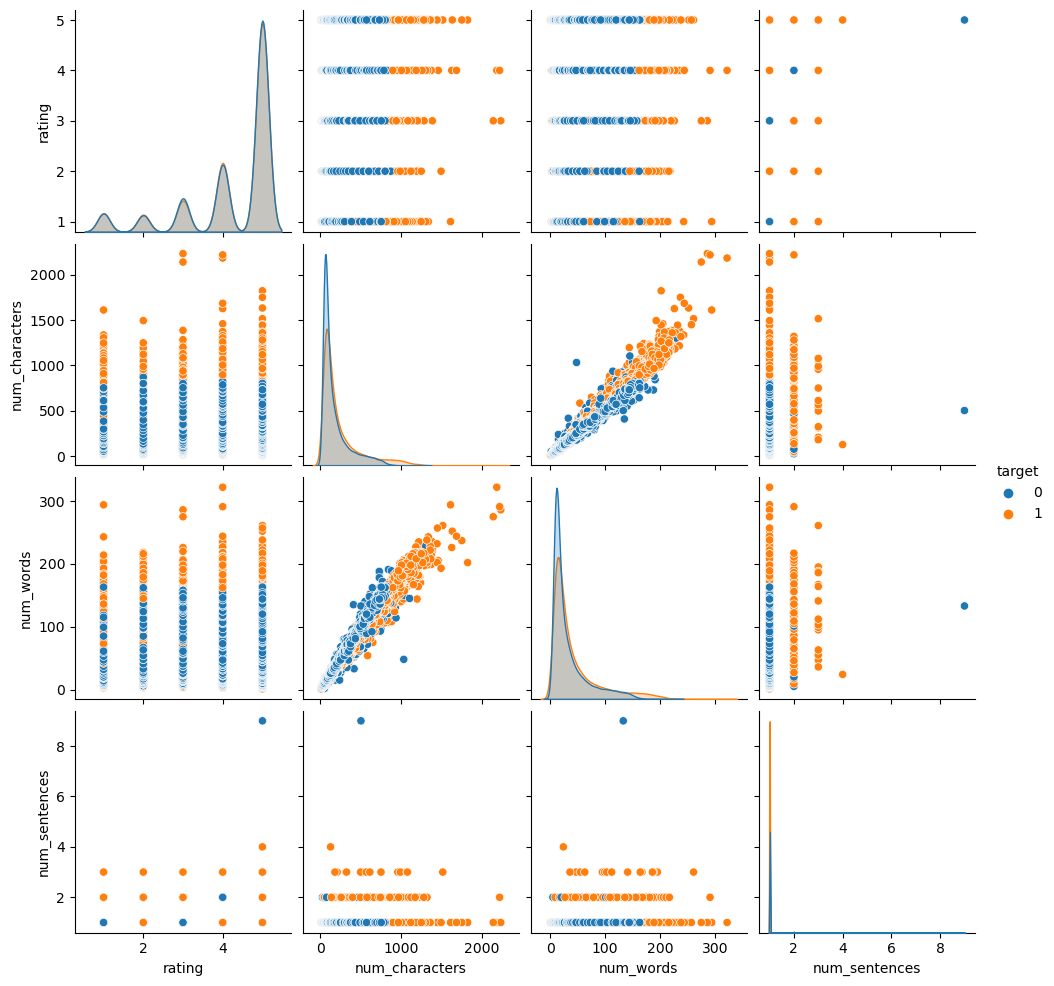

In [37]:
sns.pairplot(df,hue='target')

In [38]:
df.corr()

C:\Users\VIREN\AppData\Local\Temp\ipykernel_12300\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rating,target,num_characters,num_words,num_sentences
rating,1.000000,-0.002902,-0.074566,-0.076823,0.000916
target,-0.002902,1.000000,0.146419,0.122955,0.035071
num_characters,-0.074566,0.146419,1.000000,0.992990,0.084001
num_words,-0.076823,0.122955,0.992990,1.000000,0.083959
num_sentences,0.000916,0.035071,0.084001,0.083959,1.000000


C:\Users\VIREN\AppData\Local\Temp\ipykernel_12300\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

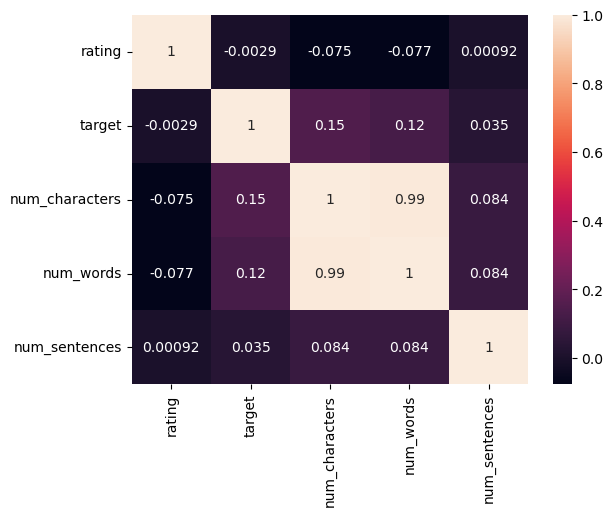

In [39]:
sns.heatmap(df.corr(),annot=True)

# 3. DATA PREPROCESSING

### 1.lower case
### 2.Tokenization
### 3.Removing special characters
### 4.Removing stop words and punctuation
### 5.Steamming

In [40]:
df['text'][0]

'love well made sturdi comfort i love veri pretti'

In [41]:
#1.lower case
#2.Tokenization 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [42]:
transform_text('Hi how are YOU???')

['hi', 'how', 'are', 'you', '?', '?', '?']

In [43]:
df['text'][0]

'love well made sturdi comfort i love veri pretti'

In [44]:
#3.Removing special characters 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    return y

In [45]:
#4.Removing stop words and punctuation
from nltk.corpus import stopwords
stopwords.words('english')



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
#5.Steamming
from nltk.stem import PorterStemmer

ps = PorterStemmer()
ps.stem('DANCING')

'danc'

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [49]:
df['transformed_text'] = df['text'].apply(transform_text)

In [50]:
df.head(10)

,category,rating,target,text,num_characters,num_words,num_sentences,transformed_text
0,Home_and_Kitchen_5,5.0,0,love well made sturdi comfort i love veri pretti,48,9,1,love well made sturdi comfort love veri pretti
1,Home_and_Kitchen_5,5.0,0,love great upgrad origin i 've mine coupl year,46,9,1,love great upgrad origin mine coupl year
2,Home_and_Kitchen_5,5.0,0,thi pillow save back i love look feel pillow,44,9,1,thi pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,0,miss inform use great product price i,37,7,1,miss inform use great product price
4,Home_and_Kitchen_5,5.0,0,veri nice set good qualiti we set two month,43,9,1,veri nice set good qualiti set two month
5,Home_and_Kitchen_5,3.0,0,i want differ flavor but they are not,37,8,1,want differ flavor
6,Home_and_Kitchen_5,5.0,0,they perfect touch thing i wish littl space,43,8,1,perfect touch thing wish littl space
7,Home_and_Kitchen_5,3.0,0,these done fit well look great i love smooth e...,54,11,1,done fit well look great love smooth edg extra
8,Home_and_Kitchen_5,5.0,0,great big number easi read thing i n't like size,48,10,1,great big number easi read thing like size
9,Home_and_Kitchen_5,5.0,0,my son love comfort well made we also babi,42,9,1,son love comfort well made also babi


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=2000, height=2000, min_font_size=5, background_color='white')


In [52]:
OG_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


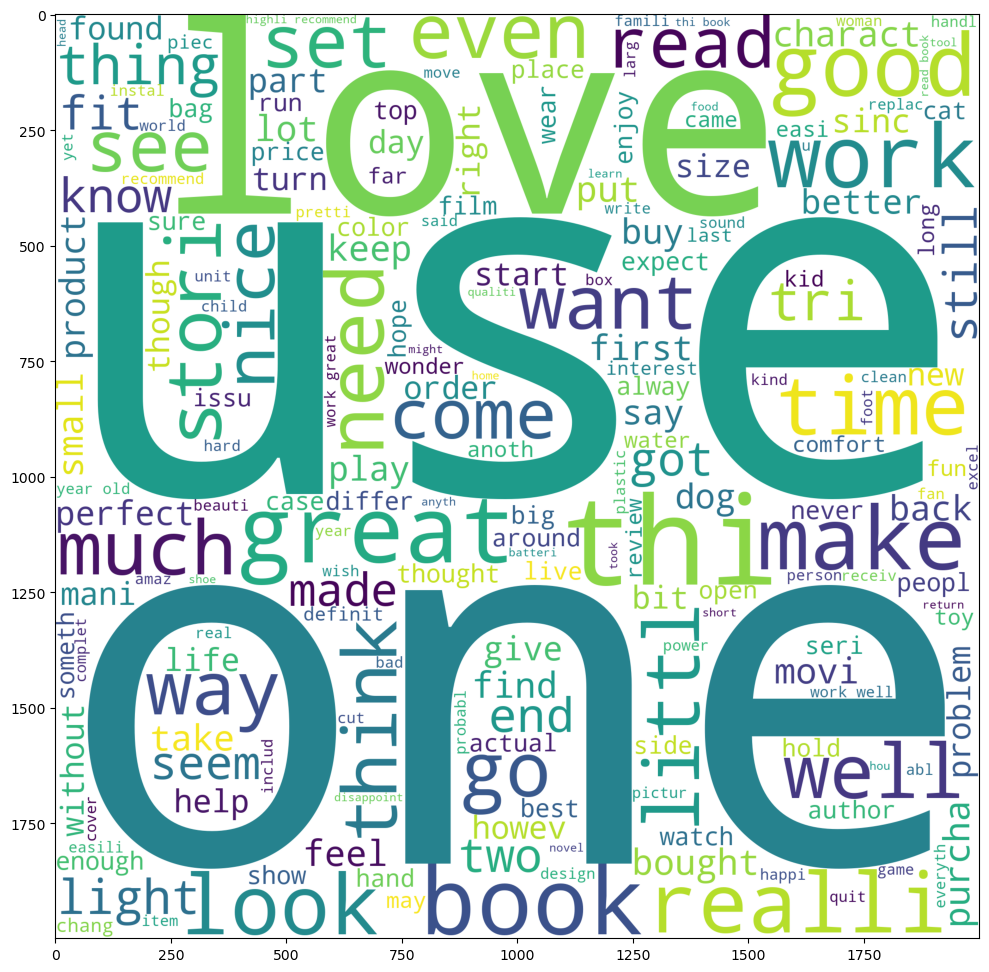

In [53]:
plt.figure(figsize= (12,12))
plt.imshow(OG_wc)

In [54]:
CG_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


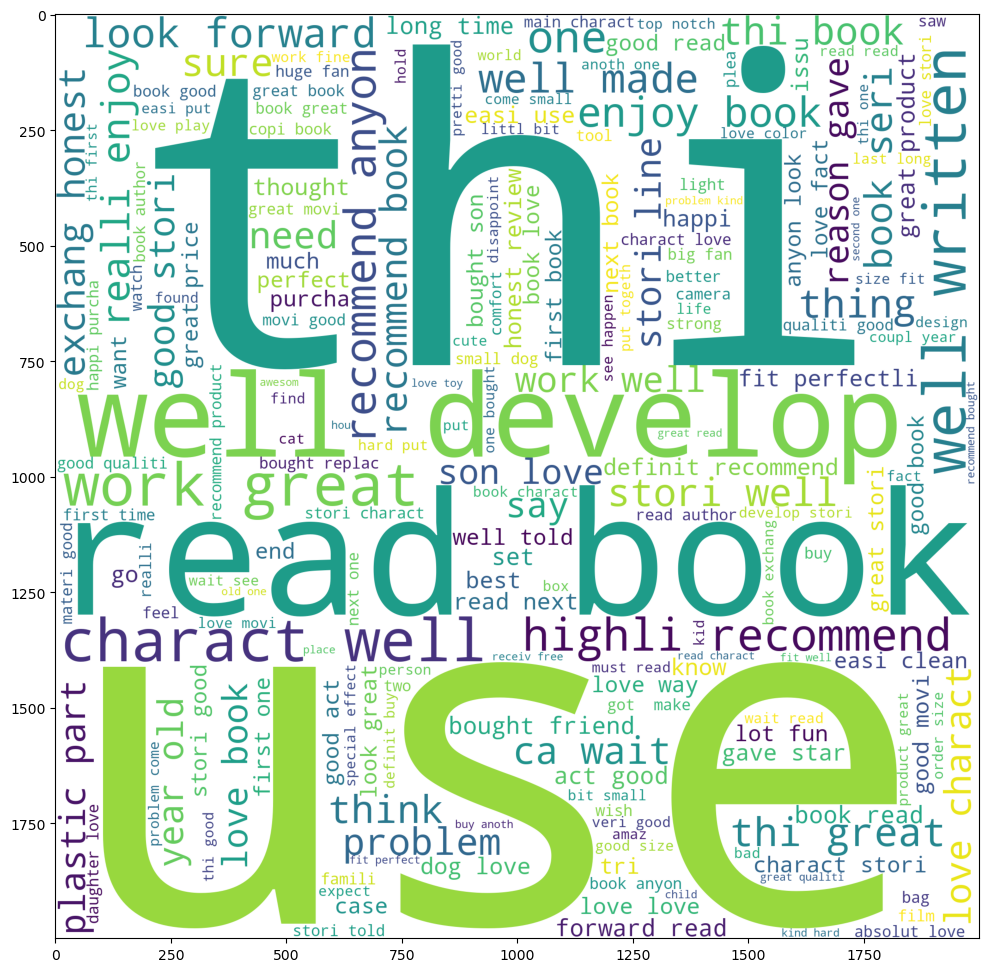

In [55]:
plt.figure(figsize= (12,12))
plt.imshow(CG_wc)

In [56]:
df.head()

,category,rating,target,text,num_characters,num_words,num_sentences,transformed_text
0,Home_and_Kitchen_5,5.0,0,love well made sturdi comfort i love veri pretti,48,9,1,love well made sturdi comfort love veri pretti
1,Home_and_Kitchen_5,5.0,0,love great upgrad origin i 've mine coupl year,46,9,1,love great upgrad origin mine coupl year
2,Home_and_Kitchen_5,5.0,0,thi pillow save back i love look feel pillow,44,9,1,thi pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,0,miss inform use great product price i,37,7,1,miss inform use great product price
4,Home_and_Kitchen_5,5.0,0,veri nice set good qualiti we set two month,43,9,1,veri nice set good qualiti set two month


In [57]:
df[df['target']==0]['transformed_text'].tolist()

['love well made sturdi comfort love veri pretti',
 'love great upgrad origin mine coupl year',
 'thi pillow save back love look feel pillow',
 'miss inform use great product price',
 'veri nice set good qualiti set two month',
 'want differ flavor',
 'perfect touch thing wish littl space',
 'done fit well look great love smooth edg extra',
 'great big number easi read thing like size',
 'son love comfort well made also babi',
 'adverti 5th one problem realli',
 'veri handi one kid tool includ packag one',
 'someon say orient great product',
 'flimsi qualiti would expect piec furnitur',
 'make may tea stir problem kind hard put',
 'absolut ador excel price wooden one month',
 'love perfect size entir famili veri good qualiti',
 'look beauti nice problem realli mesh one',
 'exactli would expect love look feel pillow',
 'star would highli recommend item love blanket',
 'great littl egg masher month',
 'adverti easi use love color also dimen',
 'exactli pictur love look feel pillow',
 'fa

In [58]:
CG_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        CG_corpus.append(words)

In [59]:
len(CG_corpus)

519566

In [60]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(CG_corpus).most_common(30))[0] , pd.DataFrame(Counter(CG_corpus).most_common(30))[1])

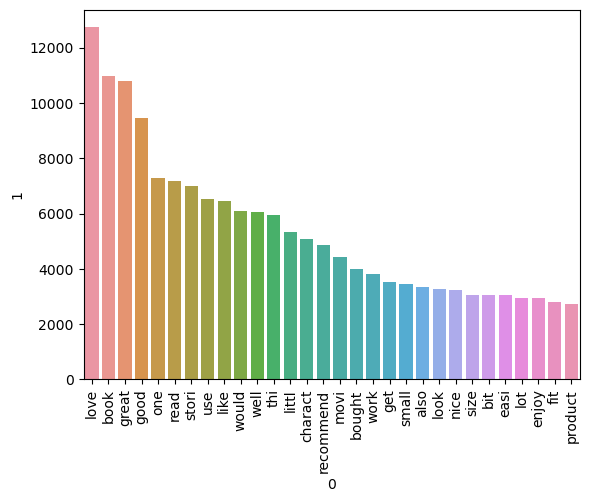

In [61]:
CG_word_counter = Counter(CG_corpus)
most_common_words_CG = CG_word_counter.most_common(30)

# Create a DataFrame from the most common words and their frequencies
df1 = pd.DataFrame(most_common_words_CG)

# Plot the barplot using the first and second columns of the DataFrame
sns.barplot(x=df1[0], y=df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
OG_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        OG_corpus.append(words)

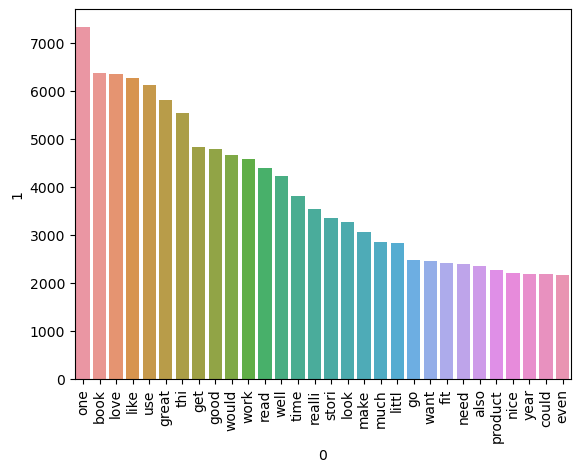

In [63]:
OG_word_counter = Counter(OG_corpus)
most_common_words_OG = OG_word_counter.most_common(30)

# Create a DataFrame from the most common words and their frequencies
df2 = pd.DataFrame(most_common_words_OG)

# Plot the barplot using the first and second columns of the DataFrame
sns.barplot(x=df2[0], y=df2[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
df.head()

,category,rating,target,text,num_characters,num_words,num_sentences,transformed_text
0,Home_and_Kitchen_5,5.0,0,love well made sturdi comfort i love veri pretti,48,9,1,love well made sturdi comfort love veri pretti
1,Home_and_Kitchen_5,5.0,0,love great upgrad origin i 've mine coupl year,46,9,1,love great upgrad origin mine coupl year
2,Home_and_Kitchen_5,5.0,0,thi pillow save back i love look feel pillow,44,9,1,thi pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,0,miss inform use great product price i,37,7,1,miss inform use great product price
4,Home_and_Kitchen_5,5.0,0,veri nice set good qualiti we set two month,43,9,1,veri nice set good qualiti set two month


## 4. Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
y = df['target'].values

In [68]:
import dask.array as da
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score  # Replace with your chosen classifier

# Assuming X is a large NumPy array
X_dask = da.from_array(X, chunks=(10000, X.shape[1]))
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_dask, y, test_size=0.2, random_state=2)

# Train your model using X_train, y_train, X_test, and y_test (Dask arrays)
#model = MultinomialNB()
#model.fit(X_train, y_train)
#predictions = model.predict(X_test)


D:\5TH\ANACONDA\lib\site-packages\sklearn\utils\__init__.py:185: PerformanceWarning: Slicing with an out-of-order index is generating 4879 times more chunks
  return array[key] if axis == 0 else array[:, key]
D:\5TH\ANACONDA\lib\site-packages\sklearn\utils\__init__.py:185: PerformanceWarning: Slicing with an out-of-order index is generating 1222 times more chunks
  return array[key] if axis == 0 else array[:, key]


In [69]:
X_train

dask.array<getitem, shape=(32344, 3000), dtype=float64, chunksize=(9, 3000), chunktype=numpy.ndarray>

In [70]:
X.shape

(40431, 3000)

In [71]:
X_train.shape

(32344, 3000)

In [72]:
X_dask

dask.array<array, shape=(40431, 3000), dtype=float64, chunksize=(10000, 3000), chunktype=numpy.ndarray>

In [73]:
y.shape

(40431,)

In [74]:
y_train.shape


(32344,)

In [75]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7482379126993941
[[3507  519]
 [1517 2544]]
0.8305582761998042


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8344256213676271
[[3446  580]
 [ 759 3302]]
0.85059247810407


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7329046618028935
[[3677  349]
 [1811 2250]]
0.8657175836860331


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [105]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [106]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [107]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

#train_classifier(svc,X_train,y_train,X_test,y_test)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8109311240262149
Precision -  0.8182503770739065
For  KN
Accuracy -  0.5005564486212439
Precision -  0.582089552238806
For  NB
Accuracy -  0.8344256213676271
Precision -  0.85059247810407
For  DT
Accuracy -  0.6167923828366514
Precision -  0.5791899901218307
For  LR
Accuracy -  0.8503771485099543
Precision -  0.8524103831891223
For  RF
Accuracy -  0.8308396191418326
Precision -  0.8626447616482629
For  AdaBoost
Accuracy -  0.7530604674168418
Precision -  0.7453637660485022
For  ETC
Accuracy -  0.8524792877457648
Precision -  0.8761804826862539
For  GBDT
Accuracy -  0.7607270928650921
Precision -  0.7487131492746841
For  xgb
Accuracy -  0.8111784345245455
Precision -  0.7986798679867987


In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.852479,0.876180
5,RF,0.830840,0.862645
4,LR,0.850377,0.852410
2,NB,0.834426,0.850592
0,SVC,0.810931,0.818250
9,xgb,0.811178,0.798680
8,GBDT,0.760727,0.748713
6,AdaBoost,0.753060,0.745364
1,KN,0.500556,0.582090
3,DT,0.616792,0.579190


In [87]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [88]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.852479
1,RF,Accuracy,0.830840
2,LR,Accuracy,0.850377
3,NB,Accuracy,0.834426
4,SVC,Accuracy,0.810931
5,xgb,Accuracy,0.811178
6,GBDT,Accuracy,0.760727
7,AdaBoost,Accuracy,0.753060
8,KN,Accuracy,0.500556
9,DT,Accuracy,0.616792


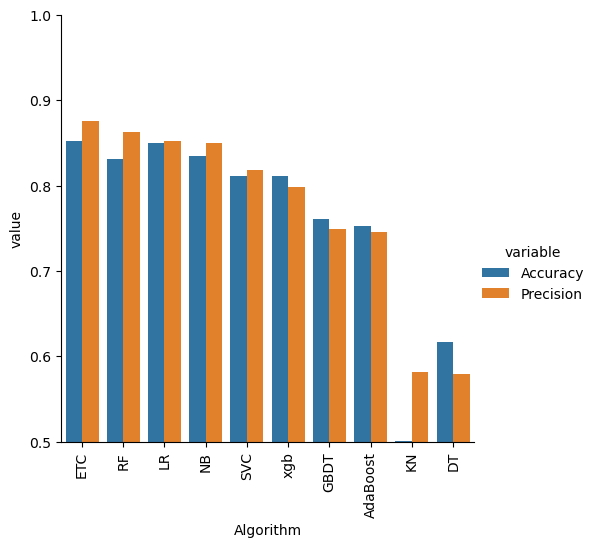

In [108]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [92]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [93]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [95]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.852479,0.876180,0.852479,0.876180,0.852479,0.876180,0.852479,0.876180
1,RF,0.830840,0.862645,0.830840,0.862645,0.830840,0.862645,0.830840,0.862645
2,LR,0.850377,0.852410,0.850377,0.852410,0.850377,0.852410,0.850377,0.852410
3,NB,0.834426,0.850592,0.834426,0.850592,0.834426,0.850592,0.834426,0.850592
4,SVC,0.810931,0.818250,0.810931,0.818250,0.810931,0.818250,0.810931,0.818250
5,xgb,0.811178,0.798680,0.811178,0.798680,0.811178,0.798680,0.811178,0.798680
6,GBDT,0.760727,0.748713,0.760727,0.748713,0.760727,0.748713,0.760727,0.748713
7,AdaBoost,0.753060,0.745364,0.753060,0.745364,0.753060,0.745364,0.753060,0.745364
8,KN,0.500556,0.582090,0.500556,0.582090,0.500556,0.582090,0.500556,0.582090
9,DT,0.616792,0.579190,0.616792,0.579190,0.616792,0.579190,0.616792,0.579190


In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))

In [103]:
sklearn.__version__

'1.2.1'

In [102]:
import sklearn


In [ ]:
pip install scikit-learn==1.2.1